In [1]:

import re
import numpy as np
import pandas as pd
import pandas
from scipy import stats as st
import imagecodecs as imcs
import cv2
import glob
import matplotlib.pyplot as plt
from pathlib import Path
import os
import statistics as st
from numpy.typing import NDArray

In [2]:
ROOT_DIR = Path(os.getcwd())
CROPPED_DATASET_DIR = ROOT_DIR / 'cropped_images'
cropped_img_paths = glob.glob(f'{CROPPED_DATASET_DIR}/*.png')

In [3]:
def get_image_shapes_from_path(path: list[Path])->NDArray:
    return np.array([imcs.imread(im).shape[:2] for im in path])

In [4]:
cropped_img_shapes = get_image_shapes_from_path(path=cropped_img_paths)

In [15]:
print(f"{len(cropped_img_shapes)} images are present.")
print(f"Min row size is {np.min(cropped_img_shapes,axis=0)[0]}")
print(f"Max row size is {np.max(cropped_img_shapes,axis=0)[0]}")
print(f"Min column size is {np.min(cropped_img_shapes,axis=0)[1]}")
print(f"Max column size is {np.max(cropped_img_shapes,axis=0)[1]}")


900 images are present.
Min row size is 600
Max row size is 600
Min column size is 800
Max column size is 800


In [7]:
cropped_img_sizes = [os.path.getsize(img_path) for img_path in cropped_img_paths]
cropped_img_sizes = np.asarray(cropped_img_sizes)//1000

print(f"minimum image size is: {min(cropped_img_sizes)} KB")
print(f"maximum image size is: {max(cropped_img_sizes)} KB")

minimum image size is: 319 KB
maximum image size is: 1291 KB


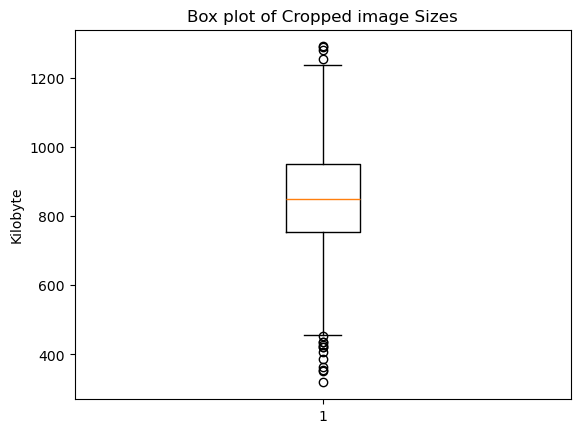

In [16]:
fig, ax = plt.subplots()
ax.boxplot(cropped_img_sizes)
ax.set_title("Box plot of Cropped image Sizes")
ax.set_ylabel("Kilobyte")
plt.show()

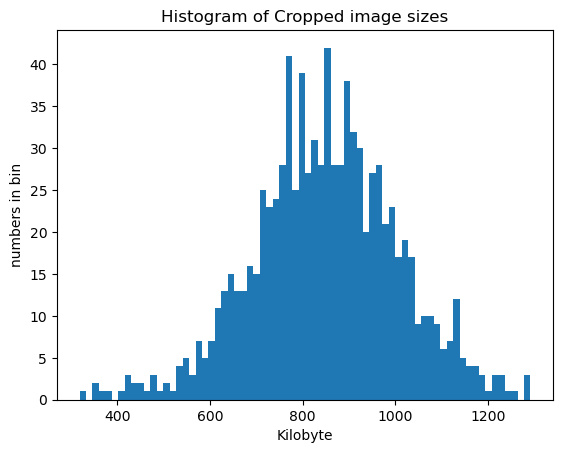

In [18]:
fig, ax = plt.subplots()
ax.hist(cropped_img_sizes,bins=70)
ax.set_title("Histogram of Cropped image sizes")
ax.set_xlabel('Kilobyte')
ax.set_ylabel('numbers in bin')
plt.show()

In [19]:
cropped_size_df = pd.DataFrame(cropped_img_sizes)
cropped_size_df.describe()

,0
count,900.000000
mean,848.867778
std,156.389681
min,319.000000
25%,753.000000
50%,849.500000
75%,952.250000
max,1291.000000
